In [76]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split 
from h2o.automl import H2OAutoML
import h2o

import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

In [21]:
train = pd.read_csv('C:/Users/whileduck/Desktop/kaggle/train.csv').drop('id',axis = 1)
test = pd.read_csv('C:/Users/whileduck/Desktop/kaggle/test.csv').drop('id',axis = 1)
sub = pd.read_csv('C:/Users/whileduck/Desktop/kaggle/sample_submission.csv')

In [22]:
df = train.copy()

In [24]:
df = pd.get_dummies(df)
test = pd.get_dummies(test)

In [28]:
X = df.drop('Age',axis = 1)
y = df['Age']

In [36]:
x_names = X.columns
y_names = 'Age'

In [66]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,34 mins 07 secs
H2O_cluster_timezone:,Asia/Seoul
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,1 month and 7 days
H2O_cluster_name:,H2O_from_python_whileduck_yw8p5u
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.014 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [68]:
train = h2o.import_file("C:/Users/whileduck/Desktop/kaggle/after_train.csv")
test = h2o.import_file("C:/Users/whileduck/Desktop/kaggle/after_test.csv")


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [50]:
x_names = x_names.tolist()

In [69]:
auto = H2OAutoML(max_runtime_secs = 3600)
auto.train(x = x_names, y = 'Age', training_frame = train)

AutoML progress: |█
19:32:34.946: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),36/82
# GBM base models (used / total),32/56
# DeepLearning base models (used / total),4/23
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [74]:
result = auto.leaderboard.as_data_frame()

Text(0.5, 1.0, 'Auto ML result')

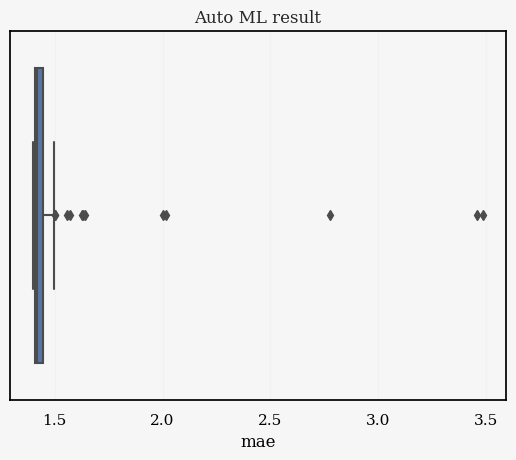

In [80]:
sns.boxplot(data = result,
            x = 'mae')
plt.title('Auto ML result')

In [91]:
top_30 = result.sort_values(by = 'mae')['model_id'][:30]

C:\Users\whileduck\AppData\Local\Temp\ipykernel_41828\2515081396.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  top_30 = result.sort_values(by = 'mae')['model_id'][:30]


In [108]:
predictions = []

for model_id in top_30:
    model = h2o.get_model(model_id)
    model_predictions = model.predict(test)
    predictions.append(model_predictions)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |████████████

In [127]:
final_predictions = sum(predictions) / len(predictions)

In [146]:
sub['Age'] = final_predictions.as_data_frame()['predict']

sub.to_csv('top30.csv', index = False)